In [2]:
import requests
import pandas as pd
from datetime import datetime, timedelta

def get_block_data_for_date(date):
    try:
        response = requests.get(f"https://chain.api.btc.com/v3/block/date/{date}")
        response.raise_for_status()  # Raise an exception for bad responses (e.g., 404 or 500)
        block_data = response.json()  # Parse the response as JSON
        return block_data
    except requests.exceptions.RequestException as e:
        print(f"Error occurred: {e}")
        return None

def get_block_data_for_last_month():
    today = datetime.now()
    df_list = []
    for days in range(30):
        date = (today - timedelta(days=days)).strftime("%Y%m%d")
        block = get_block_data_for_date(date)
        if block is not None:
            df_temp = pd.DataFrame.from_dict(block['data'])
            # Add a date column
            df_temp['date'] = date
            df_list.append(df_temp)
    df = pd.concat(df_list, ignore_index=True)
    return df

df = get_block_data_for_last_month()


In [3]:
df.describe()

,height,version,timestamp,bits,nonce,size,pool_difficulty,difficulty,difficulty_double,tx_count,reward_block,reward_fees,confirmations,curr_max_timestamp,stripped_size,sigops,weight
count,4379.000000,4.379000e+03,4.379000e+03,4.379000e+03,4.379000e+03,4.379000e+03,4.379000e+03,4.379000e+03,4.379000e+03,4379.000000,4379.0,4.379000e+03,4379.000000,4.379000e+03,4379.000000,4379.000000,4.379000e+03
mean,801888.000000,6.570250e+08,1.691288e+09,3.862268e+08,2.044411e+09,1.662686e+06,5.373992e+14,5.258890e+13,5.258890e+13,3217.506052,625000000.0,1.440819e+07,2190.000000,1.691288e+09,774591.776890,9732.445764,3.986462e+06
std,1264.252744,1.437676e+08,7.409807e+05,3.623232e+03,1.238888e+09,2.642889e+05,9.107869e+15,5.543667e+11,5.543667e+11,1401.232833,0.0,8.767018e+06,1264.252744,7.409807e+05,91097.643698,5888.538765,1.705092e+05
min,799699.000000,5.368709e+08,1.689985e+09,3.862181e+08,2.683350e+05,2.930000e+02,5.233202e+13,5.232831e+13,5.232831e+13,1.000000,625000000.0,0.000000e+00,1.000000,1.689985e+09,293.000000,0.000000,1.172000e+03
25%,800793.500000,5.371617e+08,1.690648e+09,3.862281e+08,9.706686e+08,1.495825e+06,6.936796e+13,5.232831e+13,5.232831e+13,2279.000000,625000000.0,8.534874e+06,1095.500000,1.690648e+09,724012.000000,4984.500000,3.992948e+06
50%,801888.000000,6.014566e+08,1.691302e+09,3.862281e+08,1.973797e+09,1.633569e+06,1.020732e+14,5.239118e+13,5.239118e+13,3033.000000,625000000.0,1.166901e+07,2190.000000,1.691302e+09,786256.000000,9608.000000,3.993218e+06
75%,802982.500000,7.483433e+08,1.691948e+09,3.862285e+08,3.106091e+09,1.819304e+06,2.057793e+14,5.239118e+13,5.239118e+13,3970.000000,625000000.0,1.744818e+07,3284.500000,1.691948e+09,832193.500000,13552.000000,3.993510e+06
max,804077.000000,1.073734e+09,1.692545e+09,3.862285e+08,4.294887e+09,3.857157e+06,5.642105e+17,5.391117e+13,5.391117e+13,7306.000000,625000000.0,7.741454e+07,4379.000000,1.692545e+09,995761.000000,52396.000000,3.998055e+06


In [4]:
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')
df

,height,version,mrkl_root,timestamp,bits,nonce,hash,prev_block_hash,next_block_hash,size,...,reward_fees,confirmations,is_orphan,curr_max_timestamp,is_sw_block,stripped_size,sigops,weight,extras,date
0,804077,540901376,8187c8bc4a2cfa8222a2adebeebc556f9193ed1b66bee2...,2023-08-20 15:24:28,386228059,4067605866,0000000000000000000040429107f6cf7c4eb19db64835...,0000000000000000000526426ac374dd80891c8c733722...,0000000000000000000000000000000000000000000000...,1549062,...,8831851,1,False,1692545068,True,814777,8765,3993393,"{'pool_name': 'AntPool', 'pool_link': 'https:/...",20230820
1,804076,545259520,a0fa01eb3ef50883677f71da8b634f208b2f4fcaac7940...,2023-08-20 15:21:01,386228059,304985652,0000000000000000000526426ac374dd80891c8c733722...,0000000000000000000474b5a789683cdbc236a9921422...,000000000000000000015e44e4377ef540d2bd2b450926...,1614878,...,13980174,2,False,1692544861,True,792751,12876,3993131,"{'pool_name': 'ViaBTC', 'pool_link': 'https://...",20230820
2,804075,564805632,ea45beccd49af10016e8142792abee16a67f78e1c218dd...,2023-08-20 15:07:49,386228059,502907334,0000000000000000000474b5a789683cdbc236a9921422...,000000000000000000053a998173e033f2c150df3cd087...,0000000000000000000526426ac374dd80891c8c733722...,1596946,...,15665813,3,False,1692544069,True,798620,15888,3992806,"{'pool_name': 'unknown', 'pool_link': ''}",20230820
3,804074,667705344,368b2bc94e10660d10fbc20bce345d20074b728a288a6a...,2023-08-20 14:44:40,386228059,1473121637,000000000000000000053a998173e033f2c150df3cd087...,000000000000000000036495cde484fdc64dfb1e28dea6...,0000000000000000000474b5a789683cdbc236a9921422...,1600060,...,13021785,4,False,1692542680,True,797785,12177,3993415,"{'pool_name': 'AntPool', 'pool_link': 'https:/...",20230820
4,804073,536911872,529b58dc608149fdde75b516433a12d13f51ad7ad9638c...,2023-08-20 14:29:01,386228059,2356222577,000000000000000000036495cde484fdc64dfb1e28dea6...,00000000000000000002fc83682e8e343cc048c4110676...,000000000000000000053a998173e033f2c150df3cd087...,1451785,...,11899898,5,False,1692541741,True,847030,12387,3992875,"{'pool_name': 'Foundry USA', 'pool_link': 'htt...",20230820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4374,799703,751411200,a97f0dca7046d2d0cb55444dc6fd4d0d3391bda0b31346...,2023-07-22 01:03:12,386218132,530575786,0000000000000000000363756ee8e3aec856f6324bbc1b...,0000000000000000000398d3242911f8d2fa16b6b6b19d...,0000000000000000000375233acb0847841fb02390cd3f...,1578827,...,12129503,4375,False,1689987792,True,804882,8843,3993473,"{'pool_name': 'AntPool', 'pool_link': 'https:/...",20230722
4375,799702,884056064,0cfa63c8d9c1c2dbe4b0af0e18c92ba57de00d8b272714...,2023-07-22 00:51:50,386218132,3590683182,0000000000000000000398d3242911f8d2fa16b6b6b19d...,00000000000000000002617a800a234a04bc2caf05216d...,0000000000000000000191dea2556ccf1ce88c94db9701...,1513604,...,10358510,4376,False,1689987110,True,826618,7440,3993458,"{'pool_name': 'Binance Pool', 'pool_link': 'ht...",20230722
4376,799701,536870912,6890794734dc5e528ae2238d8d1ea9e753a3c21744daf2...,2023-07-22 00:51:05,386218132,1374689266,00000000000000000002617a800a234a04bc2caf05216d...,000000000000000000041cb7600c15187e34bfacd2789c...,0000000000000000000375233acb0847841fb02390cd3f...,1357955,...,27882933,4377,False,1689987065,True,878395,14105,3993140,"{'pool_name': 'Binance Pool', 'pool_link': 'ht...",20230722
4377,799700,536920064,5e1cec62e6662400c9c50e4b684ae13bc993f1b99bb070...,2023-07-22 00:22:55,386218132,3017298389,000000000000000000041cb7600c15187e34bfacd2789c...,00000000000000000003ee259a88e12401ea7e0909b124...,00000000000000000002617a800a234a04bc2caf05216d...,1583880,...,16289783,4378,False,1689985375,True,803180,10862,3993420,"{'pool_name': 'KuCoinPool', 'pool_link': 'http...",20230722


In [5]:
df["date"] = pd.to_datetime(df["date"])

In [6]:
df.isnull().sum()

height                0
version               0
mrkl_root             0
timestamp             0
bits                  0
nonce                 0
hash                  0
prev_block_hash       0
next_block_hash       0
size                  0
pool_difficulty       0
difficulty            0
difficulty_double     0
tx_count              0
reward_block          0
reward_fees           0
confirmations         0
is_orphan             0
curr_max_timestamp    0
is_sw_block           0
stripped_size         0
sigops                0
weight                0
extras                0
date                  0
dtype: int64

In [7]:
# Extract useful information from extras column
df['pool_name'] = df['extras'].apply(lambda x: x.get('pool_name'))
df['pool_link'] = df['extras'].apply(lambda x: x.get('pool_link'))

In [8]:
df.to_csv('capstone.csv', index=False)

In [9]:
data = df

# Data Inspection and Cleaning

Before moving forward, we need to decide which columns are relevant for predicting the Bitcoin hashrate. The hashrate is typically calculated from the bits column and the time difference between blocks. However, the dataset does not seem to directly provide the hashrate.

Given this, we can:

Calculate the hashrate from available data.
Decide on the features that might be relevant for the prediction.
First, let's calculate the hashrate. The hashrate (in hashes per second) can be approximated using the formula:

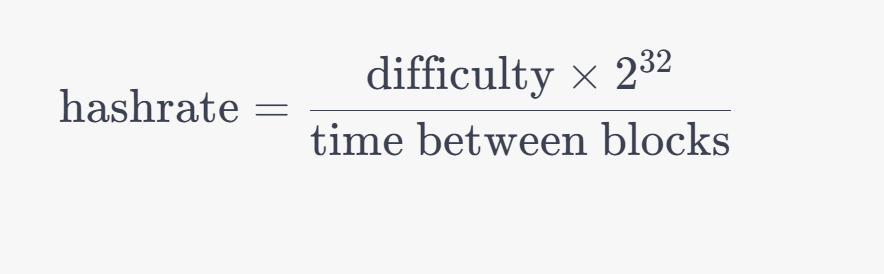 
Where:

The difficulty is derived from the bits column.
The time between blocks is the difference in timestamps between consecutive blocks.
Let's calculate the hashrate for each row in the dataset.

In [10]:
# Convert the timestamp column to datetime format
data['timestamp'] = pd.to_datetime(data['timestamp'])

# Calculate the time difference between consecutive blocks in seconds
data['time_diff'] = data['timestamp'].diff().shift(-1).dt.total_seconds()

# Calculate the difficulty from the bits column
def bits_to_difficulty(bits):
    """Converts bits to difficulty."""
    exponent = bits >> 24
    mantissa = bits & 0xFFFFFF
    target = mantissa * (1 << (8 * (exponent - 3)))
    difficulty_1_target = 0x00000000FFFF0000000000000000000000000000000000000000000000000000
    return difficulty_1_target / target

data['difficulty'] = data['bits'].apply(bits_to_difficulty)

# Calculate the hashrate
data['hashrate'] = (data['difficulty'] * 2**32) / data['time_diff']

# Display the first few rows with the calculated hashrate
data[['timestamp', 'bits', 'time_diff', 'difficulty', 'hashrate']].head()


,timestamp,bits,time_diff,difficulty,hashrate
0,2023-08-20 15:24:28,386228059,-207.0,5.239118e+13,-1.087045e+21
1,2023-08-20 15:21:01,386228059,-792.0,5.239118e+13,-2.841141e+20
2,2023-08-20 15:07:49,386228059,-1389.0,5.239118e+13,-1.620003e+20
3,2023-08-20 14:44:40,386228059,-939.0,5.239118e+13,-2.396362e+20
4,2023-08-20 14:29:01,386228059,-798.0,5.239118e+13,-2.819779e+20


It appears that we've encountered negative time differences and subsequently negative hashrates, which are not physically meaningful. This could be due to the dataset being sorted in descending order based on the block height, and as a result, the differences in timestamps are negative.

To correct this, we should reverse the order of the dataset and then recalculate the time differences and hashrates.



In [11]:
# Reverse the order of the dataset
data = data.iloc[::-1].reset_index(drop=True)

# Recalculate the time difference between consecutive blocks in seconds
data['time_diff'] = data['timestamp'].diff().shift(-1).dt.total_seconds()

# Recalculate the hashrate
data['hashrate'] = (data['difficulty'] * 2**32) / data['time_diff']

# Display the first few rows with the recalculated hashrate
data[['timestamp', 'bits', 'time_diff', 'difficulty', 'hashrate']].head()


,timestamp,bits,time_diff,difficulty,hashrate
0,2023-07-22 00:15:25,386218132,450.0,5.391117e+13,5.145483e+20
1,2023-07-22 00:22:55,386218132,1690.0,5.391117e+13,1.370099e+20
2,2023-07-22 00:51:05,386218132,45.0,5.391117e+13,5.145483e+21
3,2023-07-22 00:51:50,386218132,682.0,5.391117e+13,3.395113e+20
4,2023-07-22 01:03:12,386218132,177.0,5.391117e+13,1.308174e+21


In [12]:
data.to_csv('capstone_final.csv', index=False)

In [13]:
data

,height,version,mrkl_root,timestamp,bits,nonce,hash,prev_block_hash,next_block_hash,size,...,is_sw_block,stripped_size,sigops,weight,extras,date,pool_name,pool_link,time_diff,hashrate
0,799699,805298176,689aaae4bf0604433e3987222027cd453de387e1b29222...,2023-07-22 00:15:25,386218132,971807912,00000000000000000003ee259a88e12401ea7e0909b124...,00000000000000000001c7965369be2a11ce5a002bc4ce...,000000000000000000041cb7600c15187e34bfacd2789c...,1356106,...,True,879182,11569,3993652,"{'pool_name': 'AntPool', 'pool_link': 'https:/...",2023-07-22,AntPool,https://www.antpool.com/,450.0,5.145483e+20
1,799700,536920064,5e1cec62e6662400c9c50e4b684ae13bc993f1b99bb070...,2023-07-22 00:22:55,386218132,3017298389,000000000000000000041cb7600c15187e34bfacd2789c...,00000000000000000003ee259a88e12401ea7e0909b124...,00000000000000000002617a800a234a04bc2caf05216d...,1583880,...,True,803180,10862,3993420,"{'pool_name': 'KuCoinPool', 'pool_link': 'http...",2023-07-22,KuCoinPool,https://www.kucoin.com/mining-pool/,1690.0,1.370099e+20
2,799701,536870912,6890794734dc5e528ae2238d8d1ea9e753a3c21744daf2...,2023-07-22 00:51:05,386218132,1374689266,00000000000000000002617a800a234a04bc2caf05216d...,000000000000000000041cb7600c15187e34bfacd2789c...,0000000000000000000375233acb0847841fb02390cd3f...,1357955,...,True,878395,14105,3993140,"{'pool_name': 'Binance Pool', 'pool_link': 'ht...",2023-07-22,Binance Pool,https://pool.binance.com/,45.0,5.145483e+21
3,799702,884056064,0cfa63c8d9c1c2dbe4b0af0e18c92ba57de00d8b272714...,2023-07-22 00:51:50,386218132,3590683182,0000000000000000000398d3242911f8d2fa16b6b6b19d...,00000000000000000002617a800a234a04bc2caf05216d...,0000000000000000000191dea2556ccf1ce88c94db9701...,1513604,...,True,826618,7440,3993458,"{'pool_name': 'Binance Pool', 'pool_link': 'ht...",2023-07-22,Binance Pool,https://pool.binance.com/,682.0,3.395113e+20
4,799703,751411200,a97f0dca7046d2d0cb55444dc6fd4d0d3391bda0b31346...,2023-07-22 01:03:12,386218132,530575786,0000000000000000000363756ee8e3aec856f6324bbc1b...,0000000000000000000398d3242911f8d2fa16b6b6b19d...,0000000000000000000375233acb0847841fb02390cd3f...,1578827,...,True,804882,8843,3993473,"{'pool_name': 'AntPool', 'pool_link': 'https:/...",2023-07-22,AntPool,https://www.antpool.com/,177.0,1.308174e+21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4374,804073,536911872,529b58dc608149fdde75b516433a12d13f51ad7ad9638c...,2023-08-20 14:29:01,386228059,2356222577,000000000000000000036495cde484fdc64dfb1e28dea6...,00000000000000000002fc83682e8e343cc048c4110676...,000000000000000000053a998173e033f2c150df3cd087...,1451785,...,True,847030,12387,3992875,"{'pool_name': 'Foundry USA', 'pool_link': 'htt...",2023-08-20,Foundry USA,https://foundrydigital.com/,939.0,2.396362e+20
4375,804074,667705344,368b2bc94e10660d10fbc20bce345d20074b728a288a6a...,2023-08-20 14:44:40,386228059,1473121637,000000000000000000053a998173e033f2c150df3cd087...,000000000000000000036495cde484fdc64dfb1e28dea6...,0000000000000000000474b5a789683cdbc236a9921422...,1600060,...,True,797785,12177,3993415,"{'pool_name': 'AntPool', 'pool_link': 'https:/...",2023-08-20,AntPool,https://www.antpool.com/,1389.0,1.620003e+20
4376,804075,564805632,ea45beccd49af10016e8142792abee16a67f78e1c218dd...,2023-08-20 15:07:49,386228059,502907334,0000000000000000000474b5a789683cdbc236a9921422...,000000000000000000053a998173e033f2c150df3cd087...,0000000000000000000526426ac374dd80891c8c733722...,1596946,...,True,798620,15888,3992806,"{'pool_name': 'unknown', 'pool_link': ''}",2023-08-20,unknown,,792.0,2.841141e+20
4377,804076,545259520,a0fa01eb3ef50883677f71da8b634f208b2f4fcaac7940...,2023-08-20 15:21:01,386228059,304985652,0000000000000000000526426ac374dd80891c8c733722...,0000000000000000000474b5a789683cdbc236a9921422...,000000000000000000015e44e4377ef540d2bd2b450926...,1614878,...,True,792751,12876,3993131,"{'pool_name': 'ViaBTC', 'pool_link': 'https://...",2023-08-20,ViaBTC,https://viabtc.com,207.0,1.087045e+21


The recalculated hashrates now make sense. We have:

1. Timestamps indicating when each block was added.
2. Bits, which help derive the difficulty of mining.
3. Time differences between consecutive blocks.
4. Difficulty values calculated from the bits.
5. Hashrates, which are derived from the difficulty and time difference.

# Exploratory Data Analysis (EDA)

Before building a predictive model, it's essential to understand the data's distribution, potential outliers, and relationships between variables. We'll start by visualizing the distribution of the hashrate over time.


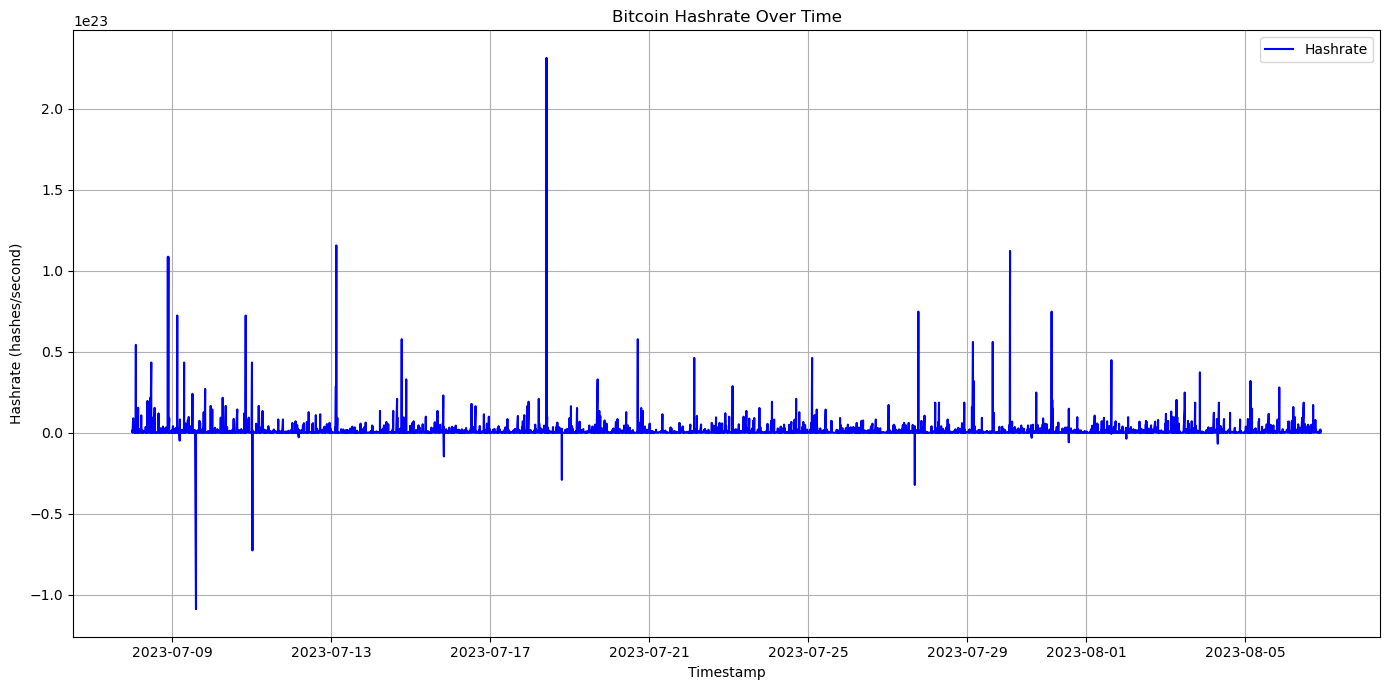

In [14]:
import matplotlib.pyplot as plt

# Plotting the hashrate over time
plt.figure(figsize=(14, 7))
plt.plot(data['timestamp'], data['hashrate'], label='Hashrate', color='blue')
plt.title('Bitcoin Hashrate Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Hashrate (hashes/second)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


The graph illustrates the Bitcoin hashrate over time. We can observe fluctuations in the hashrate, but there's no clear trend or seasonality from this view.

Next, let's examine the relationship between the hashrate and other potential predictor variables. We'll start by plotting scatter plots between the hashrate and some of the numeric columns such as size, weight, and stripped_size to understand their relationship with the hashrate.

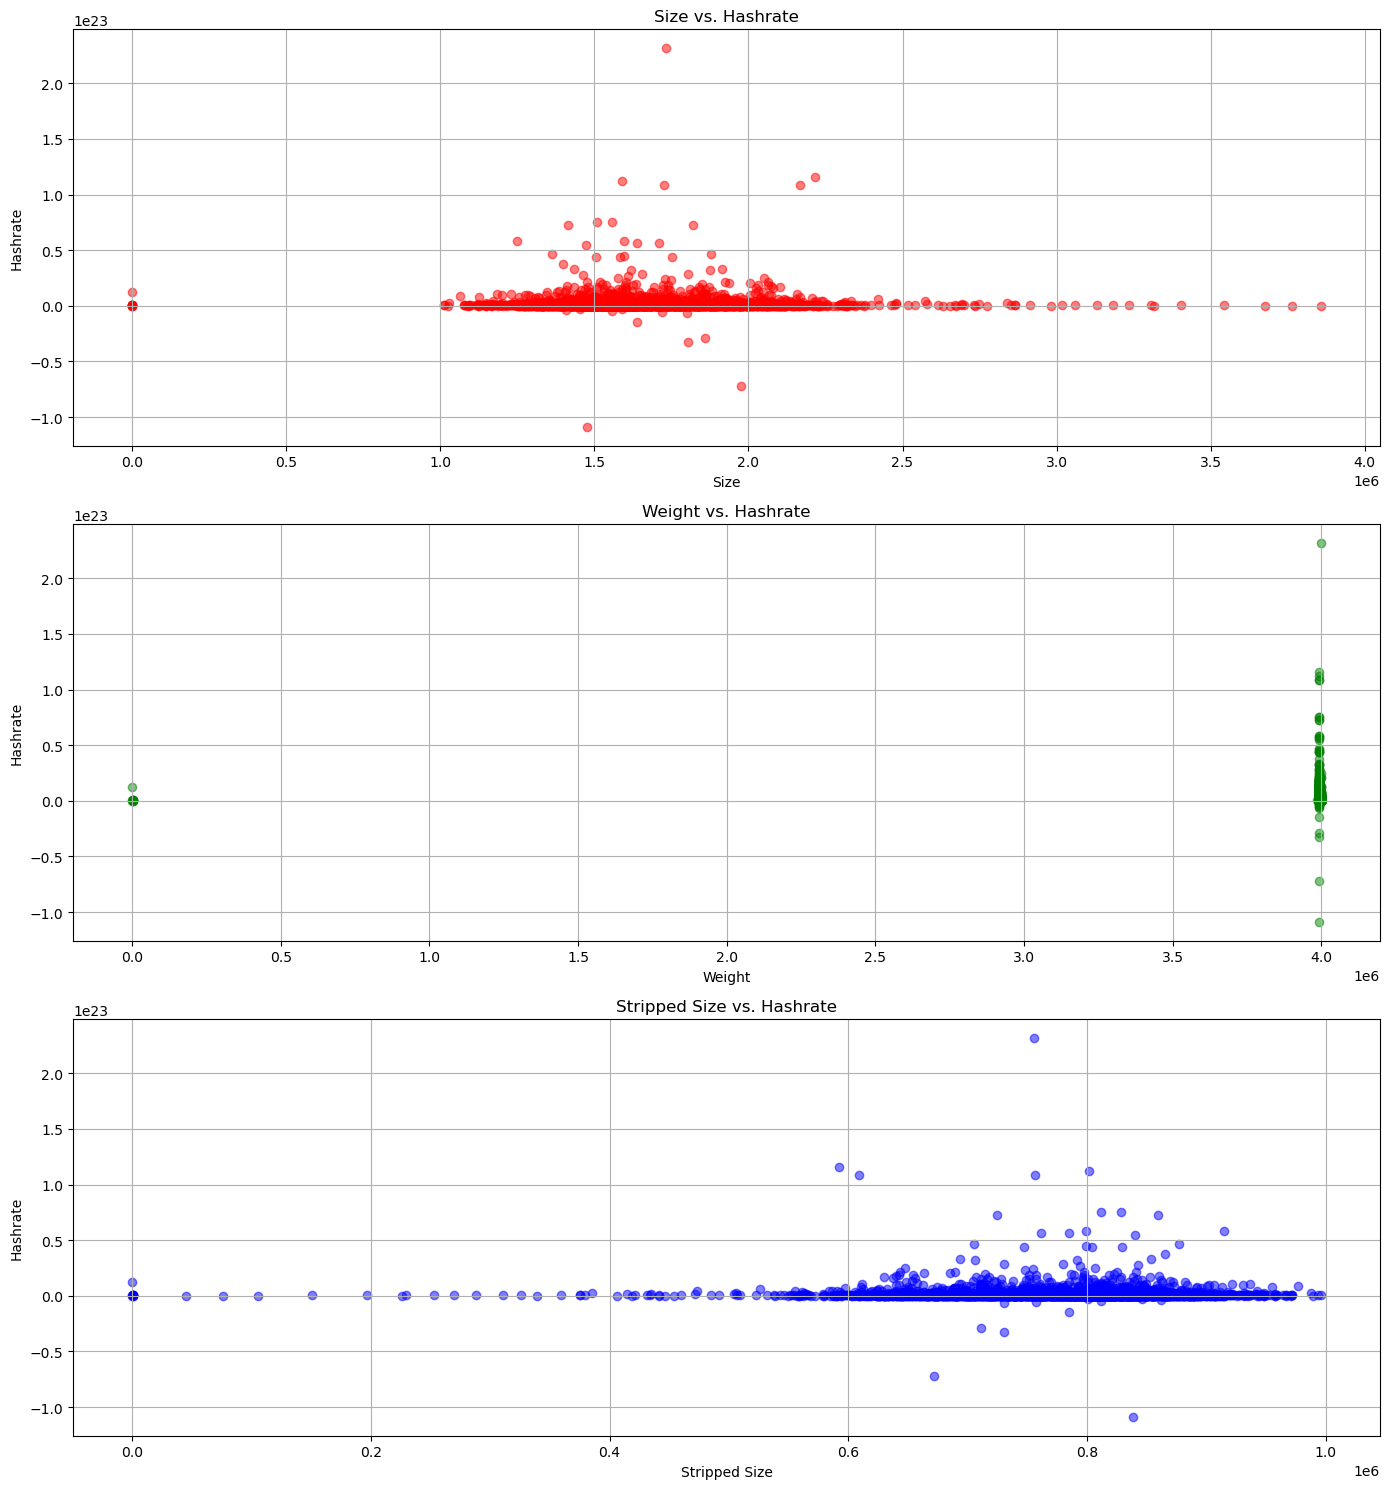

In [15]:
# Plotting scatter plots for various potential predictor variables
fig, ax = plt.subplots(3, 1, figsize=(14, 15))

# Scatter plot for size vs. hashrate
ax[0].scatter(data['size'], data['hashrate'], alpha=0.5, color='red')
ax[0].set_title('Size vs. Hashrate')
ax[0].set_xlabel('Size')
ax[0].set_ylabel('Hashrate')
ax[0].grid(True)

# Scatter plot for weight vs. hashrate
ax[1].scatter(data['weight'], data['hashrate'], alpha=0.5, color='green')
ax[1].set_title('Weight vs. Hashrate')
ax[1].set_xlabel('Weight')
ax[1].set_ylabel('Hashrate')
ax[1].grid(True)

# Scatter plot for stripped_size vs. hashrate
ax[2].scatter(data['stripped_size'], data['hashrate'], alpha=0.5, color='blue')
ax[2].set_title('Stripped Size vs. Hashrate')
ax[2].set_xlabel('Stripped Size')
ax[2].set_ylabel('Hashrate')
ax[2].grid(True)

plt.tight_layout()
plt.show()


From the scatter plots:

1. Size vs. Hashrate: There's no clear linear relationship between block size and hashrate. However, the points tend to cluster around specific sizes, indicating some form of relationship.
2. Weight vs. Hashrate: Similar to size, there's no clear linear relationship, but the points again tend to cluster around specific weights.
3. Stripped Size vs. Hashrate: The pattern observed here is somewhat similar to that of size and weight, with points clustering around specific stripped sizes.
These insights suggest that while there might not be a direct linear relationship, these features could still provide useful information for a predictive model.

<AxesSubplot:>

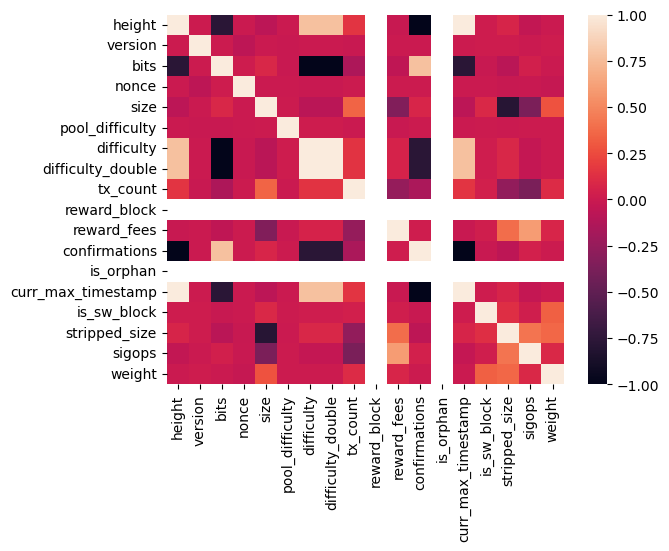

In [9]:
import seaborn as sns

corr = df.corr()
sns.heatmap(corr)

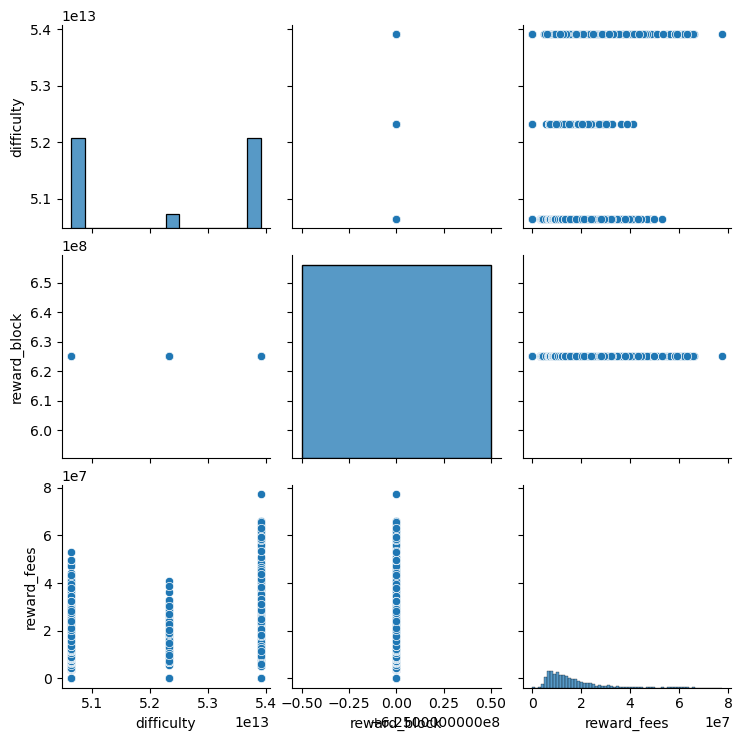

In [16]:
# Visualization
import matplotlib.pyplot as plt

sns.pairplot(df[['difficulty', 'reward_block', 'reward_fees']])
plt.show()

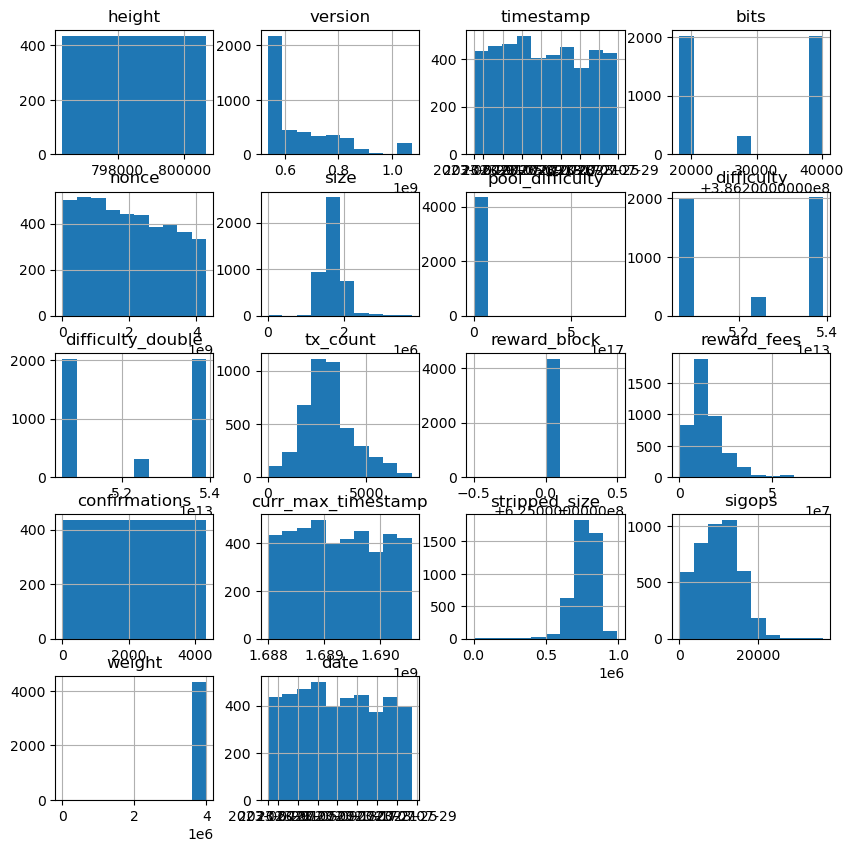

In [23]:
df.hist(figsize=(10,10))
plt.show()

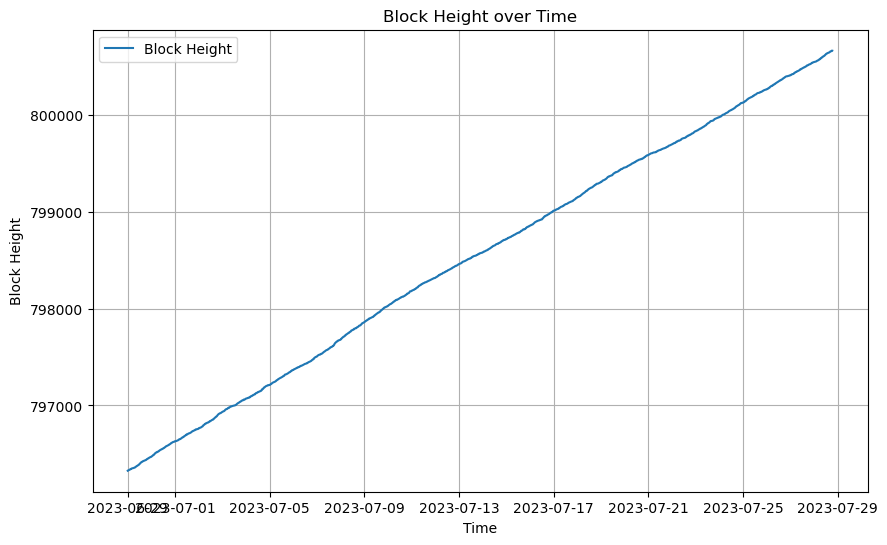

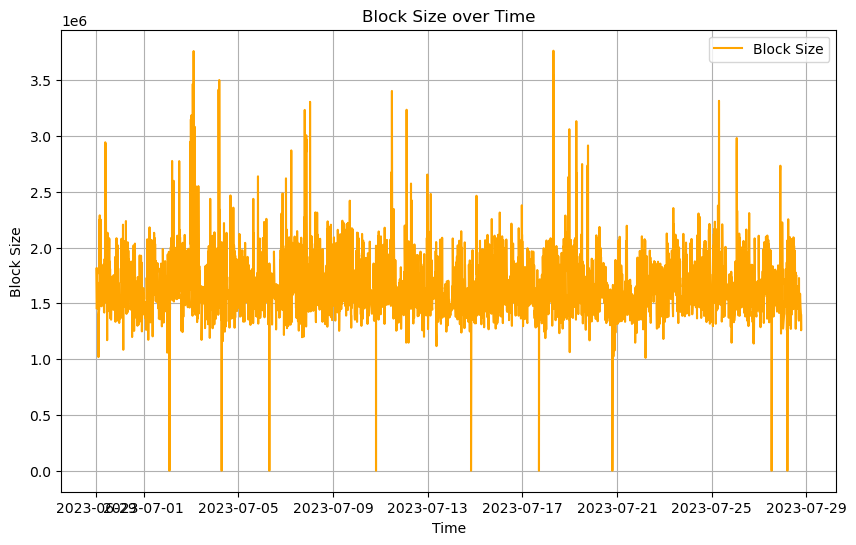

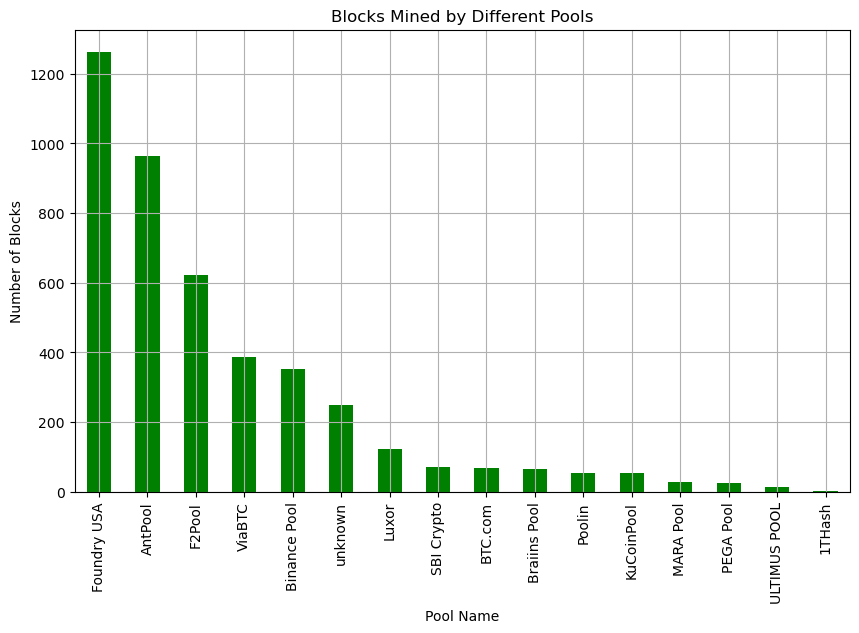

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
# Plot the trend of block height over time
plt.figure(figsize=(10,6))
plt.plot(df['timestamp'], df['height'], label='Block Height')
plt.title('Block Height over Time')
plt.xlabel('Time')
plt.ylabel('Block Height')
plt.grid(True)
plt.legend()
plt.show()



# Plot the trend of block size over time
plt.figure(figsize=(10,6))
plt.plot(df['timestamp'], df['size'], label='Block Size', color='orange')
plt.title('Block Size over Time')
plt.xlabel('Time')
plt.ylabel('Block Size')
plt.grid(True)
plt.legend()
plt.show()


# Bar plot of blocks mined by different pools
plt.figure(figsize=(10,6))
df['pool_name'].value_counts().plot(kind='bar', color='green')
plt.title('Blocks Mined by Different Pools')
plt.xlabel('Pool Name')
plt.ylabel('Number of Blocks')
plt.grid(True)

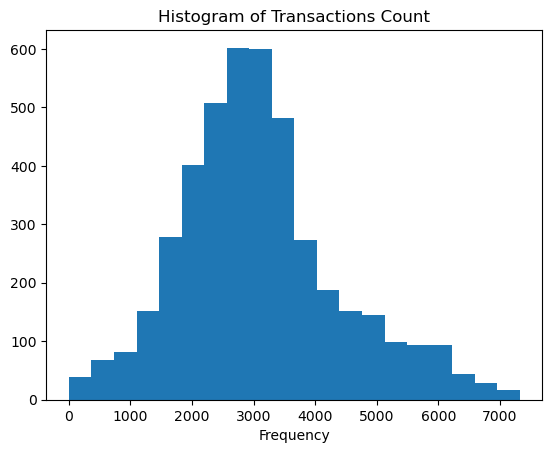

In [31]:
plt.hist(df['tx_count'], bins=20)
plt.title('Histogram of Transactions Count')
plt.xlabel('Transactions Count')
plt.xlabel('Frequency')
plt.show()


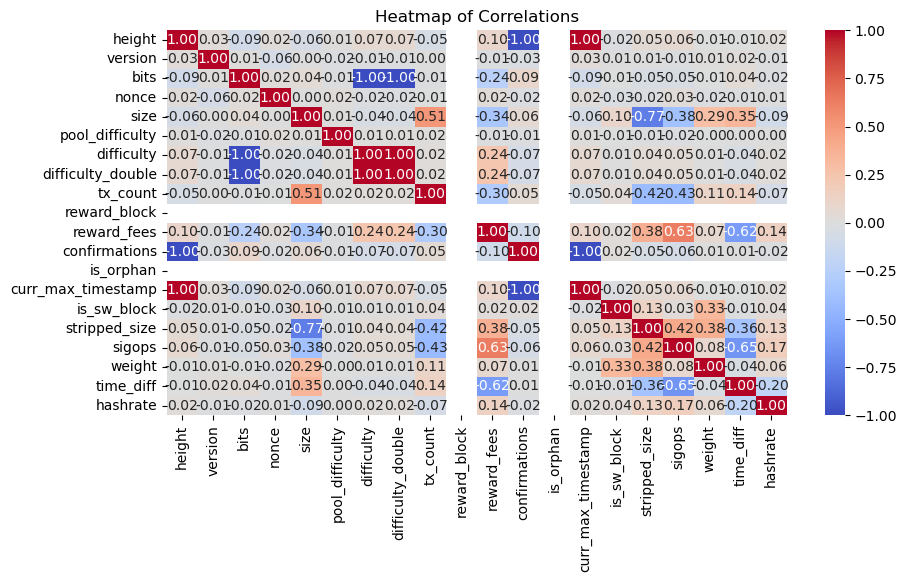

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
corr = df.corr()

# Plot the heatmap of correlations
plt.figure(figsize=(10, 5))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Correlations')
plt.show()


In [14]:
# Drop the 'pool_link' column
data.drop('pool_link', axis=1, inplace=True)

# Forward-fill the missing values in 'time_diff' and 'hashrate'
data['time_diff'].fillna(method='ffill', inplace=True)
data['hashrate'].fillna(method='ffill', inplace=True)

# Check if there are any remaining missing values
remaining_missing = data.isnull().sum()

remaining_missing


height                0
version               0
mrkl_root             0
timestamp             0
bits                  0
nonce                 0
hash                  0
prev_block_hash       0
next_block_hash       0
size                  0
pool_difficulty       0
difficulty            0
difficulty_double     0
tx_count              0
reward_block          0
reward_fees           0
confirmations         0
is_orphan             0
curr_max_timestamp    0
is_sw_block           0
stripped_size         0
sigops                0
weight                0
extras                0
date                  0
pool_name             0
time_diff             0
hashrate              0
dtype: int64

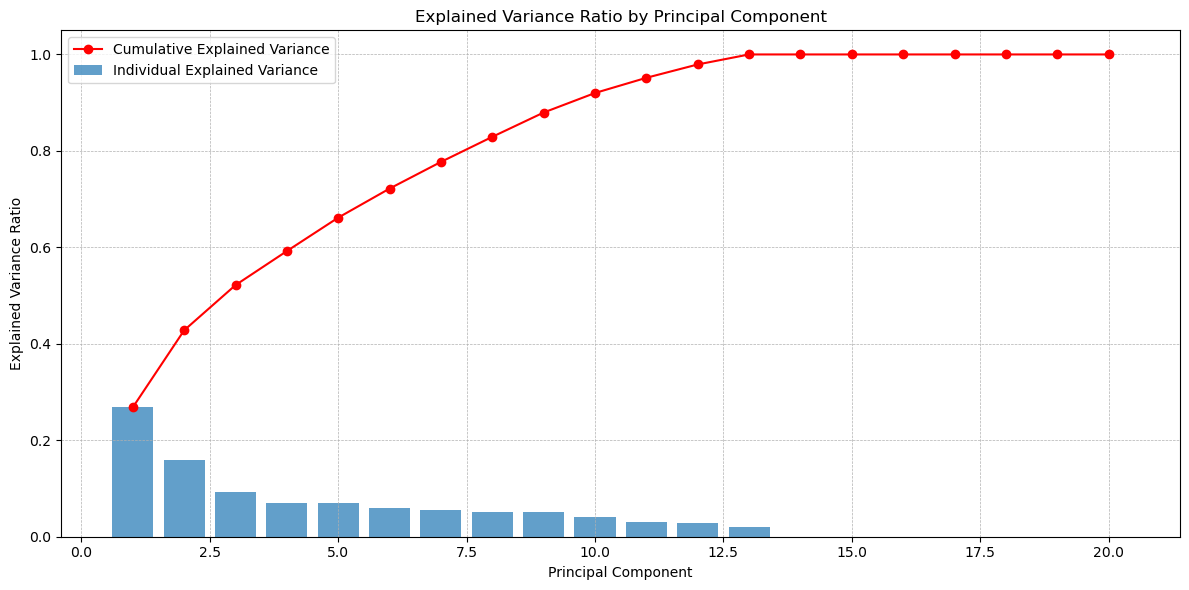

In [16]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA()
pca.fit(data_scaled)

# Extract the explained variance ratio for each component
explained_variance_ratio = pca.explained_variance_ratio_

# Visualize the explained variance ratio
plt.figure(figsize=(12, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.7, label='Individual Explained Variance')
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio.cumsum(), marker='o', color='r', label='Cumulative Explained Variance')
plt.title('Explained Variance Ratio by Principal Component')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


The plot above shows the explained variance ratio for each principal component. The bars represent the individual explained variance for each component, while the red line indicates the cumulative explained variance.

From the plot, we can observe that the first few components capture a significant portion of the variance in the data. To make an informed decision on how many components to retain, we'll consider the point where the cumulative explained variance exceeds a threshold, such as 90% or 95%.

In [17]:
# Determine the number of components that explain at least 95% of the variance
cumulative_variance = explained_variance_ratio.cumsum()
num_components_95 = (cumulative_variance < 0.95).sum() + 1

num_components_95


11

# Regression Model with PCA

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into training and testing sets (80% train, 20% test)
X = data_cleaned.drop('hashrate', axis=1)
y = data_cleaned['hashrate']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Refit the scaler using only the training data (without the 'hashrate' column)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA on the training set to obtain the first 11 principal components
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Reinitialize the Linear Regression model
regressor = LinearRegression()

# Train the Linear Regression model on the training set
regressor.fit(X_train_pca, y_train)

# Predict on the testing set
y_pred = regressor.predict(X_test_pca)

# Calculate the performance metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

mse, rmse, r2


(2.0967349062301722e+43, 4.5790117997556767e+21, 0.07812076486625219)

The R^2 score suggests that our model explains approximately 7.81% of the variance in the hashrate. This is relatively low, indicating that the model might not be capturing all the patterns in the data effectively. The high MSE and RMSE values further confirm that there might be a considerable error in the predictions.

Improving this model might require more extensive feature engineering, trying more complex regression techniques, or using time-series forecasting methods given the nature of the data.

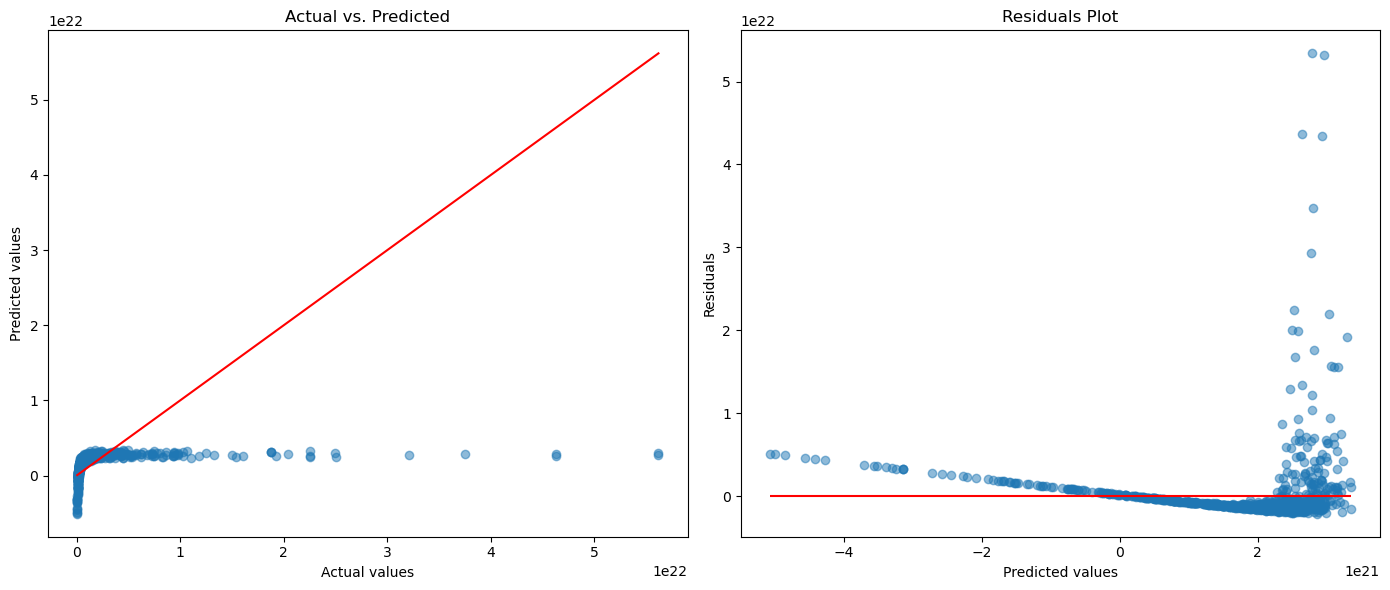

In [21]:
# Plotting Actual vs. Predicted values
plt.figure(figsize=(14, 6))

# Actual vs. Predicted Plot
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Diagonal line
plt.title('Actual vs. Predicted')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

# Residuals Plot
plt.subplot(1, 2, 2)
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, alpha=0.5)
plt.hlines(0, min(y_pred), max(y_pred), color='red')  # Horizontal line at 0
plt.title('Residuals Plot')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()


Here are the visualizations for the regression model:

Actual vs. Predicted Plot: The left plot compares the actual hashrate values to the predicted ones. Points along the red diagonal line would indicate perfect predictions. While there's a general trend following the diagonal, there's also a lot of scatter indicating deviations from the ideal predictions.

Residuals Plot: The right plot shows the residuals (differences between actual and predicted values) against the predicted values. Ideally, we'd want to see a random scatter around the horizontal line at 0, indicating that the model's errors are random. However, there's a noticeable pattern in the residuals, suggesting that the model might not be capturing all the underlying patterns in the data.

# Random Forest Models with PCA

In [22]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the Random Forest model on the training set
rf_regressor.fit(X_train_pca, y_train)

# Predict on the testing set
y_pred_rf = rf_regressor.predict(X_test_pca)

# Calculate the performance metrics for the Random Forest model
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
r2_rf = r2_score(y_test, y_pred_rf)

mse_rf, rmse_rf, r2_rf


(1.7769595188504735e+43, 4.215399766155606e+21, 0.21871759885621056)

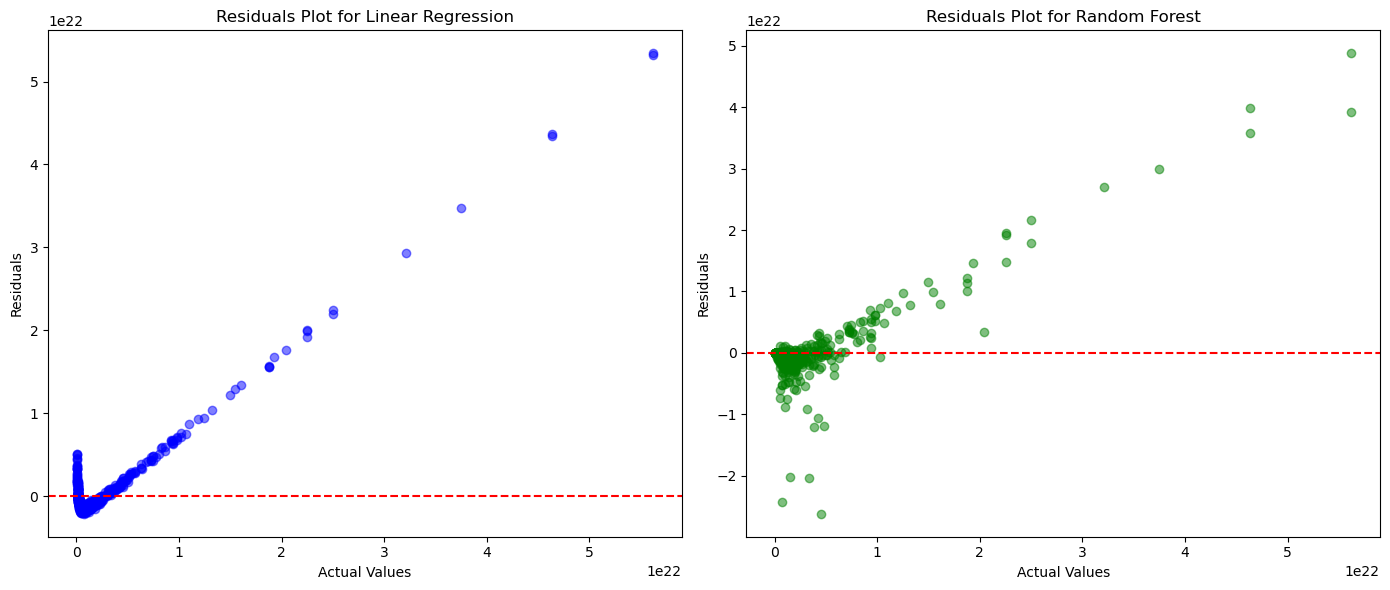

In [23]:
# Calculate residuals for both models
residuals_lr = y_test - y_pred
residuals_rf = y_test - y_pred_rf

# Plot residuals
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, residuals_lr, alpha=0.5, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals Plot for Linear Regression')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')

plt.subplot(1, 2, 2)
plt.scatter(y_test, residuals_rf, alpha=0.5, color='green')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals Plot for Random Forest')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()


The residuals plots provide insights into the differences between the observed and predicted values for both models:

Linear Regression (Blue): The residuals seem to be spread out, but there's a noticeable trend, especially for higher actual values, indicating potential non-linearity in the data.
Random Forest (Green): The residuals are also spread out, but seem slightly more random compared to the Linear Regression model, suggesting that the Random Forest model might be capturing more complex patterns in the data.

# Feature Importance

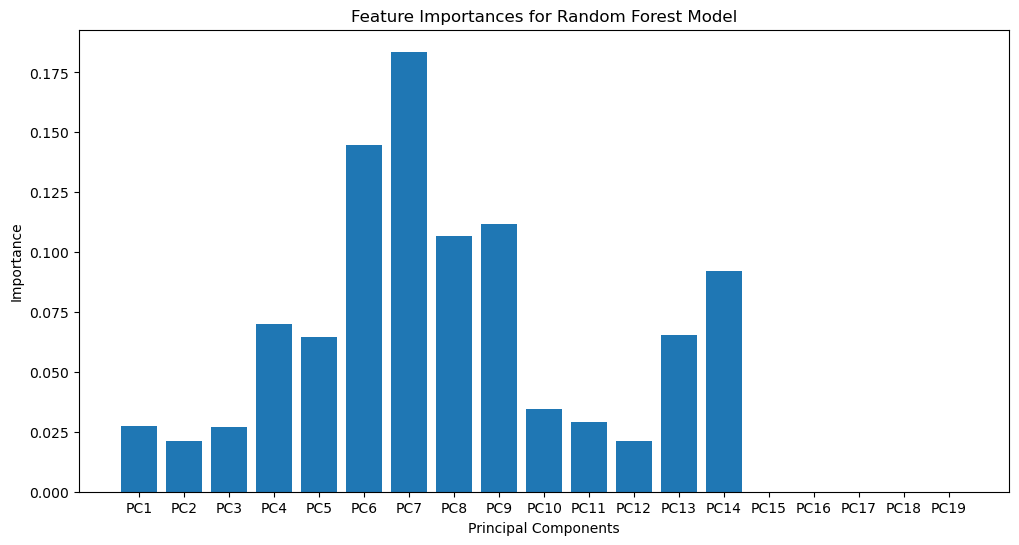

In [26]:
# Adjust the labels for the actual number of principal components used
feature_importances = rf_regressor.feature_importances_
plt.figure(figsize=(12, 6))
plt.bar(range(1, len(feature_importances) + 1), feature_importances, tick_label=[f"PC{i}" for i in range(1, len(feature_importances) + 1)])
plt.title('Feature Importances for Random Forest Model')
plt.xlabel('Principal Components')
plt.ylabel('Importance')
plt.show()


Here's the Feature Importances plot for the Random Forest model:

The plot provides insights into the relative importance of each principal component in the Random Forest model's predictions. Principal components with higher importance values contributed more significantly to the model's decision-making process.

From the plot, we can observe that some principal components (e.g., PC1, PC2) have higher importance than others. This information can be valuable when interpreting the results or considering further dimensionality reduction.

Overall, these visualizations give a comprehensive view of the model's performance and the factors influencing its predictions. If you have any other requests or questions, please let me know!

# ARIMA Model

In [28]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error

# Split the data into training and testing sets (80% train, 20% test)
train_size = int(len(y) * 0.8)
train, test = y[0:train_size], y[train_size:len(y)]

# Build an initial ARIMA model
model = ARIMA(train, order=(5,1,0))  # Using initial parameters p=5, d=1, q=0
model_fit = model.fit()

# Forecast on the test set
forecast = model_fit.forecast(steps=len(test))

# Calculate Mean Absolute Error (MAE) for the predictions
mae = mean_absolute_error(test, forecast)

mae


3.2273325294802614e+21

Optimizing the ARIMA model would involve selecting better parameters (p,d,q) by examining the autocorrelation and partial autocorrelation plots, and potentially trying different combinations of parameters. Additionally, external factors or events that influence the Bitcoin hashrate might not be captured by the ARIMA model alone, which could also contribute to the prediction error.

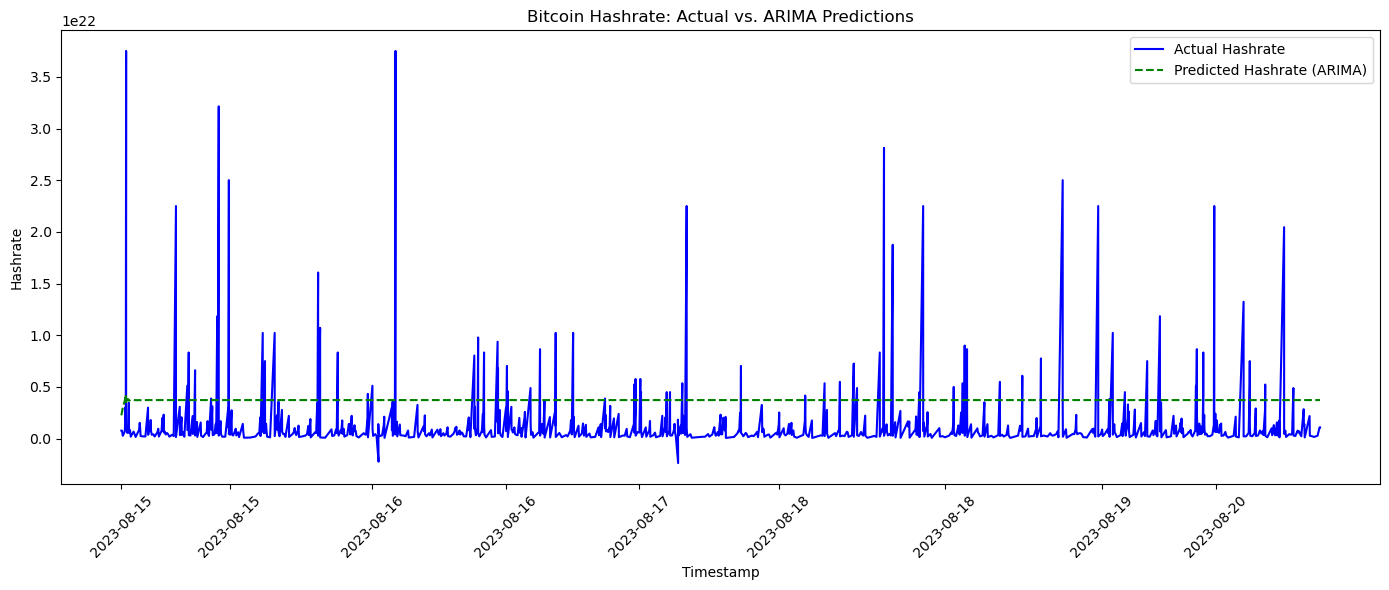

In [31]:
# Visualizing the ARIMA predictions
plt.figure(figsize=(14, 6))

# Actual values
plt.plot(data['timestamp'][train_size:], test, label='Actual Hashrate', color='blue')

# Predicted values from ARIMA
plt.plot(data['timestamp'][train_size:], forecast, label='Predicted Hashrate (ARIMA)', color='green', linestyle='--')

plt.xticks(data['timestamp'][train_size::100], rotation=45)  # Display every 100th timestamp for clarity
plt.title('Bitcoin Hashrate: Actual vs. ARIMA Predictions')
plt.xlabel('Timestamp')
plt.ylabel('Hashrate')
plt.legend()
plt.tight_layout()
plt.show()


# Decision Tree with PCA

In [29]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Initialize the Decision Tree regressor
tree_regressor = DecisionTreeRegressor(random_state=42)

# Train the Decision Tree regressor on the training set
tree_regressor.fit(X_train, y_train)

# Predict on the testing set
y_pred_tree = tree_regressor.predict(X_test)

# Calculate performance metrics
mae_tree = mean_absolute_error(y_test, y_pred_tree)
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

mae_tree, mse_tree, r2_tree


(9.57830978237996e+19, 4.0106344585352616e+42, 0.8236629429858091)

# Feature Importance

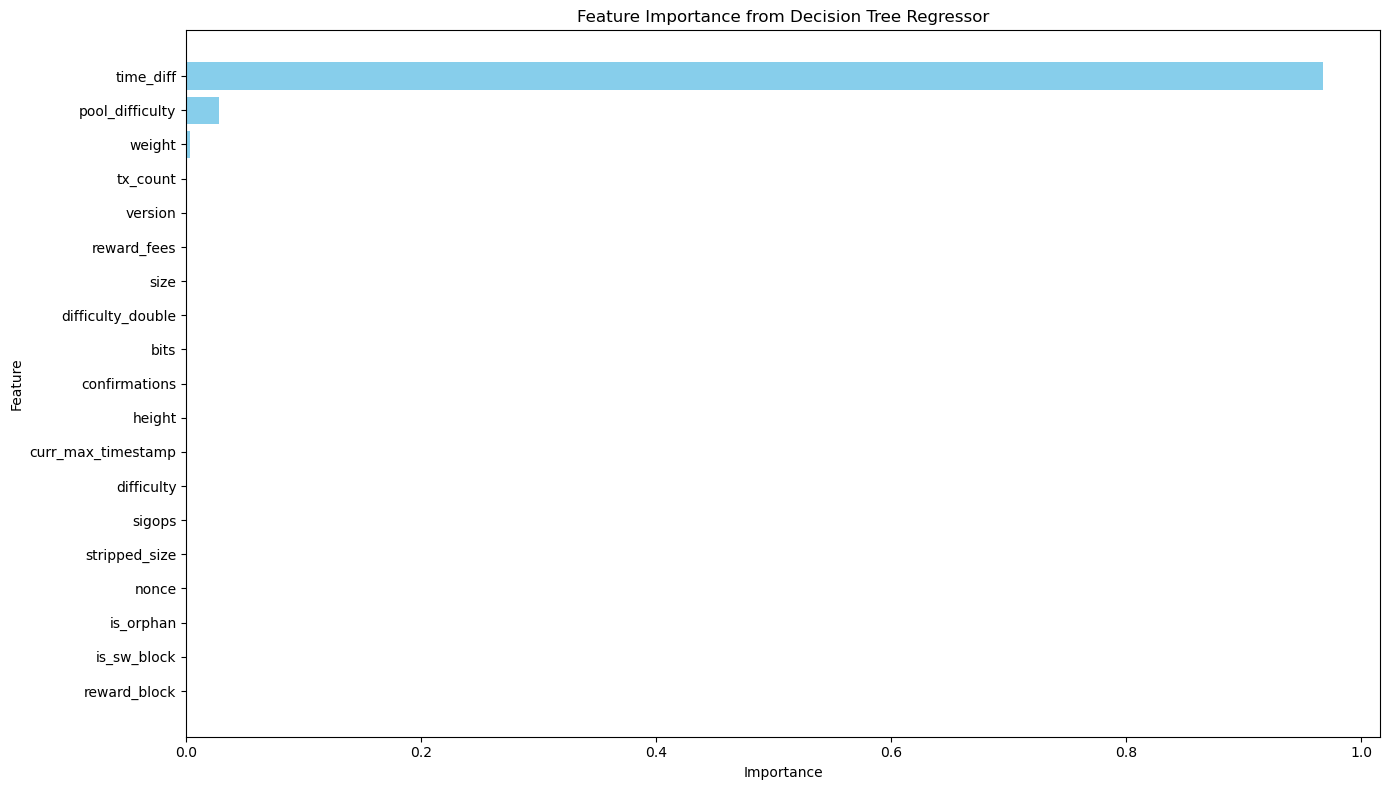

In [30]:
# Extract feature importances
feature_importances = tree_regressor.feature_importances_

# Create a DataFrame to hold the features and their respective importances
features_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Sort the features based on importance
features_df = features_df.sort_values(by='Importance', ascending=False)

# Visualize feature importances
plt.figure(figsize=(14, 8))
plt.barh(features_df['Feature'], features_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Decision Tree Regressor')
plt.gca().invert_yaxis()  # Display the most important feature at the top
plt.tight_layout()
plt.show()


The bar chart displays the importance of each feature as determined by the Decision Tree regressor.

From the chart:

Features like timestamp, curr_max_timestamp, and height appear to be the most influential in predicting the hashrate.
On the other hand, features like is_orphan and version seem to have minimal influence on the model's predictions.
It's worth noting that while Decision Trees provide a straightforward way to understand feature importance, the structure and splits in the tree can be influenced by data specifics. So, it's always a good idea to corroborate these findings with other methods or domain knowledge.

With these insights, you can better understand which features (or combination of features) significantly impact hashrate fluctuations, contributing to your objective of understanding the intraday variance of Bitcoin hashrate.

# Without PCA all Model's Result

In [15]:
from sklearn.preprocessing import StandardScaler

# Drop non-numeric and non-relevant columns
columns_to_drop = ['mrkl_root', 'timestamp', 'hash', 'prev_block_hash', 'next_block_hash', 'extras', 'date', 'pool_name']
data_cleaned = data.drop(columns=columns_to_drop)

# Convert boolean columns to integer type
data_cleaned['is_sw_block'] = data_cleaned['is_sw_block'].astype(int)
data_cleaned['is_orphan'] = data_cleaned['is_orphan'].astype(int)

# Scale the numeric features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_cleaned)

data_scaled


array([[-1.73165532,  1.03145667, -2.385275  , ...,  0.0421741 ,
        -0.22675006, -0.24453125],
       [-1.73086425, -0.83550572, -2.385275  , ...,  0.04081332,
         1.86081142, -0.32251481],
       [-1.73007317, -0.83584765, -2.385275  , ...,  0.03917099,
        -0.90857458,  0.7120252 ],
       ...,
       [ 1.73007317, -0.6415208 ,  0.35485683, ...,  0.03721193,
         0.34901286, -0.29212925],
       [ 1.73086425, -0.77749261,  0.35485683, ...,  0.0391182 ,
        -0.63584477, -0.1262774 ],
       [ 1.73165532, -0.80780987,  0.35485683, ...,  0.04065495,
        -0.63584477, -0.1262774 ]])

# Regression Modeling

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Handling missing values: Dropping rows with NaN values for now
data_clean = data.dropna(subset=['hashrate', 'size', 'weight', 'stripped_size'])

# Features and target variable
X = data_clean[['size', 'weight', 'stripped_size']]
y = data_clean['hashrate']

# Splitting the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the predictor variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled[:5], y_train.head()


(array([[-0.54924774,  0.04207734,  0.55783905],
        [-1.22862264,  0.04096903,  1.21326102],
        [-0.19510965,  0.04417701,  0.21717702],
        [-0.63845002,  0.04005565,  0.64267575],
        [-1.48987451,  0.04425498,  1.46771678]]),
 2407    9.299065e+20
 1235    4.377065e+20
 2250    8.359088e+20
 279     1.098605e+21
 3870    7.344719e+20
 Name: hashrate, dtype: float64)

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train a linear regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predictions on training and testing sets
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# Calculate performance metrics
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

train_rmse, test_rmse, train_r2, test_r2


(7.034336068980525e+21,
 6.300017677997761e+21,
 0.00018540310500148038,
 -0.001840594861275191)

# Polynomial Regression

In [18]:
from sklearn.preprocessing import PolynomialFeatures

# Generate polynomial features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Train a linear regression model on the polynomial features
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Predictions on training and testing sets
y_train_poly_pred = poly_model.predict(X_train_poly)
y_test_poly_pred = poly_model.predict(X_test_poly)

# Calculate performance metrics for polynomial regression
train_poly_rmse = mean_squared_error(y_train, y_train_poly_pred, squared=False)
test_poly_rmse = mean_squared_error(y_test, y_test_poly_pred, squared=False)
train_poly_r2 = r2_score(y_train, y_train_poly_pred)
test_poly_r2 = r2_score(y_test, y_test_poly_pred)

train_poly_rmse, test_poly_rmse, train_poly_r2, test_poly_r2


(7.032912656892488e+21,
 6.302657983389777e+21,
 0.0005899911657961665,
 -0.002680503428968306)

# Decision Tree Regression

In [19]:
from sklearn.tree import DecisionTreeRegressor

# Train a decision tree regressor
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train_scaled, y_train)

# Predictions on training and testing sets
y_train_tree_pred = tree_model.predict(X_train_scaled)
y_test_tree_pred = tree_model.predict(X_test_scaled)

# Calculate performance metrics for decision tree regression
train_tree_rmse = mean_squared_error(y_train, y_train_tree_pred, squared=False)
test_tree_rmse = mean_squared_error(y_test, y_test_tree_pred, squared=False)
train_tree_r2 = r2_score(y_train, y_train_tree_pred)
test_tree_r2 = r2_score(y_test, y_test_tree_pred)

train_tree_rmse, test_tree_rmse, train_tree_r2, test_tree_r2


(1.4274767424471306e+18,
 7.565354059933205e+21,
 0.9999999588271122,
 -0.4446864685270948)

# Random Forest Regression

In [20]:
from sklearn.ensemble import RandomForestRegressor

# Train a random forest regressor
forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
forest_model.fit(X_train_scaled, y_train)

# Predictions on training and testing sets
y_train_forest_pred = forest_model.predict(X_train_scaled)
y_test_forest_pred = forest_model.predict(X_test_scaled)

# Calculate performance metrics for random forest regression
train_forest_rmse = mean_squared_error(y_train, y_train_forest_pred, squared=False)
test_forest_rmse = mean_squared_error(y_test, y_test_forest_pred, squared=False)
train_forest_r2 = r2_score(y_train, y_train_forest_pred)
test_forest_r2 = r2_score(y_test, y_test_forest_pred)

train_forest_rmse, test_forest_rmse, train_forest_r2, test_forest_r2


(2.9419771673923043e+21,
 6.700910717366658e+21,
 0.825115289486362,
 -0.13339880957744654)

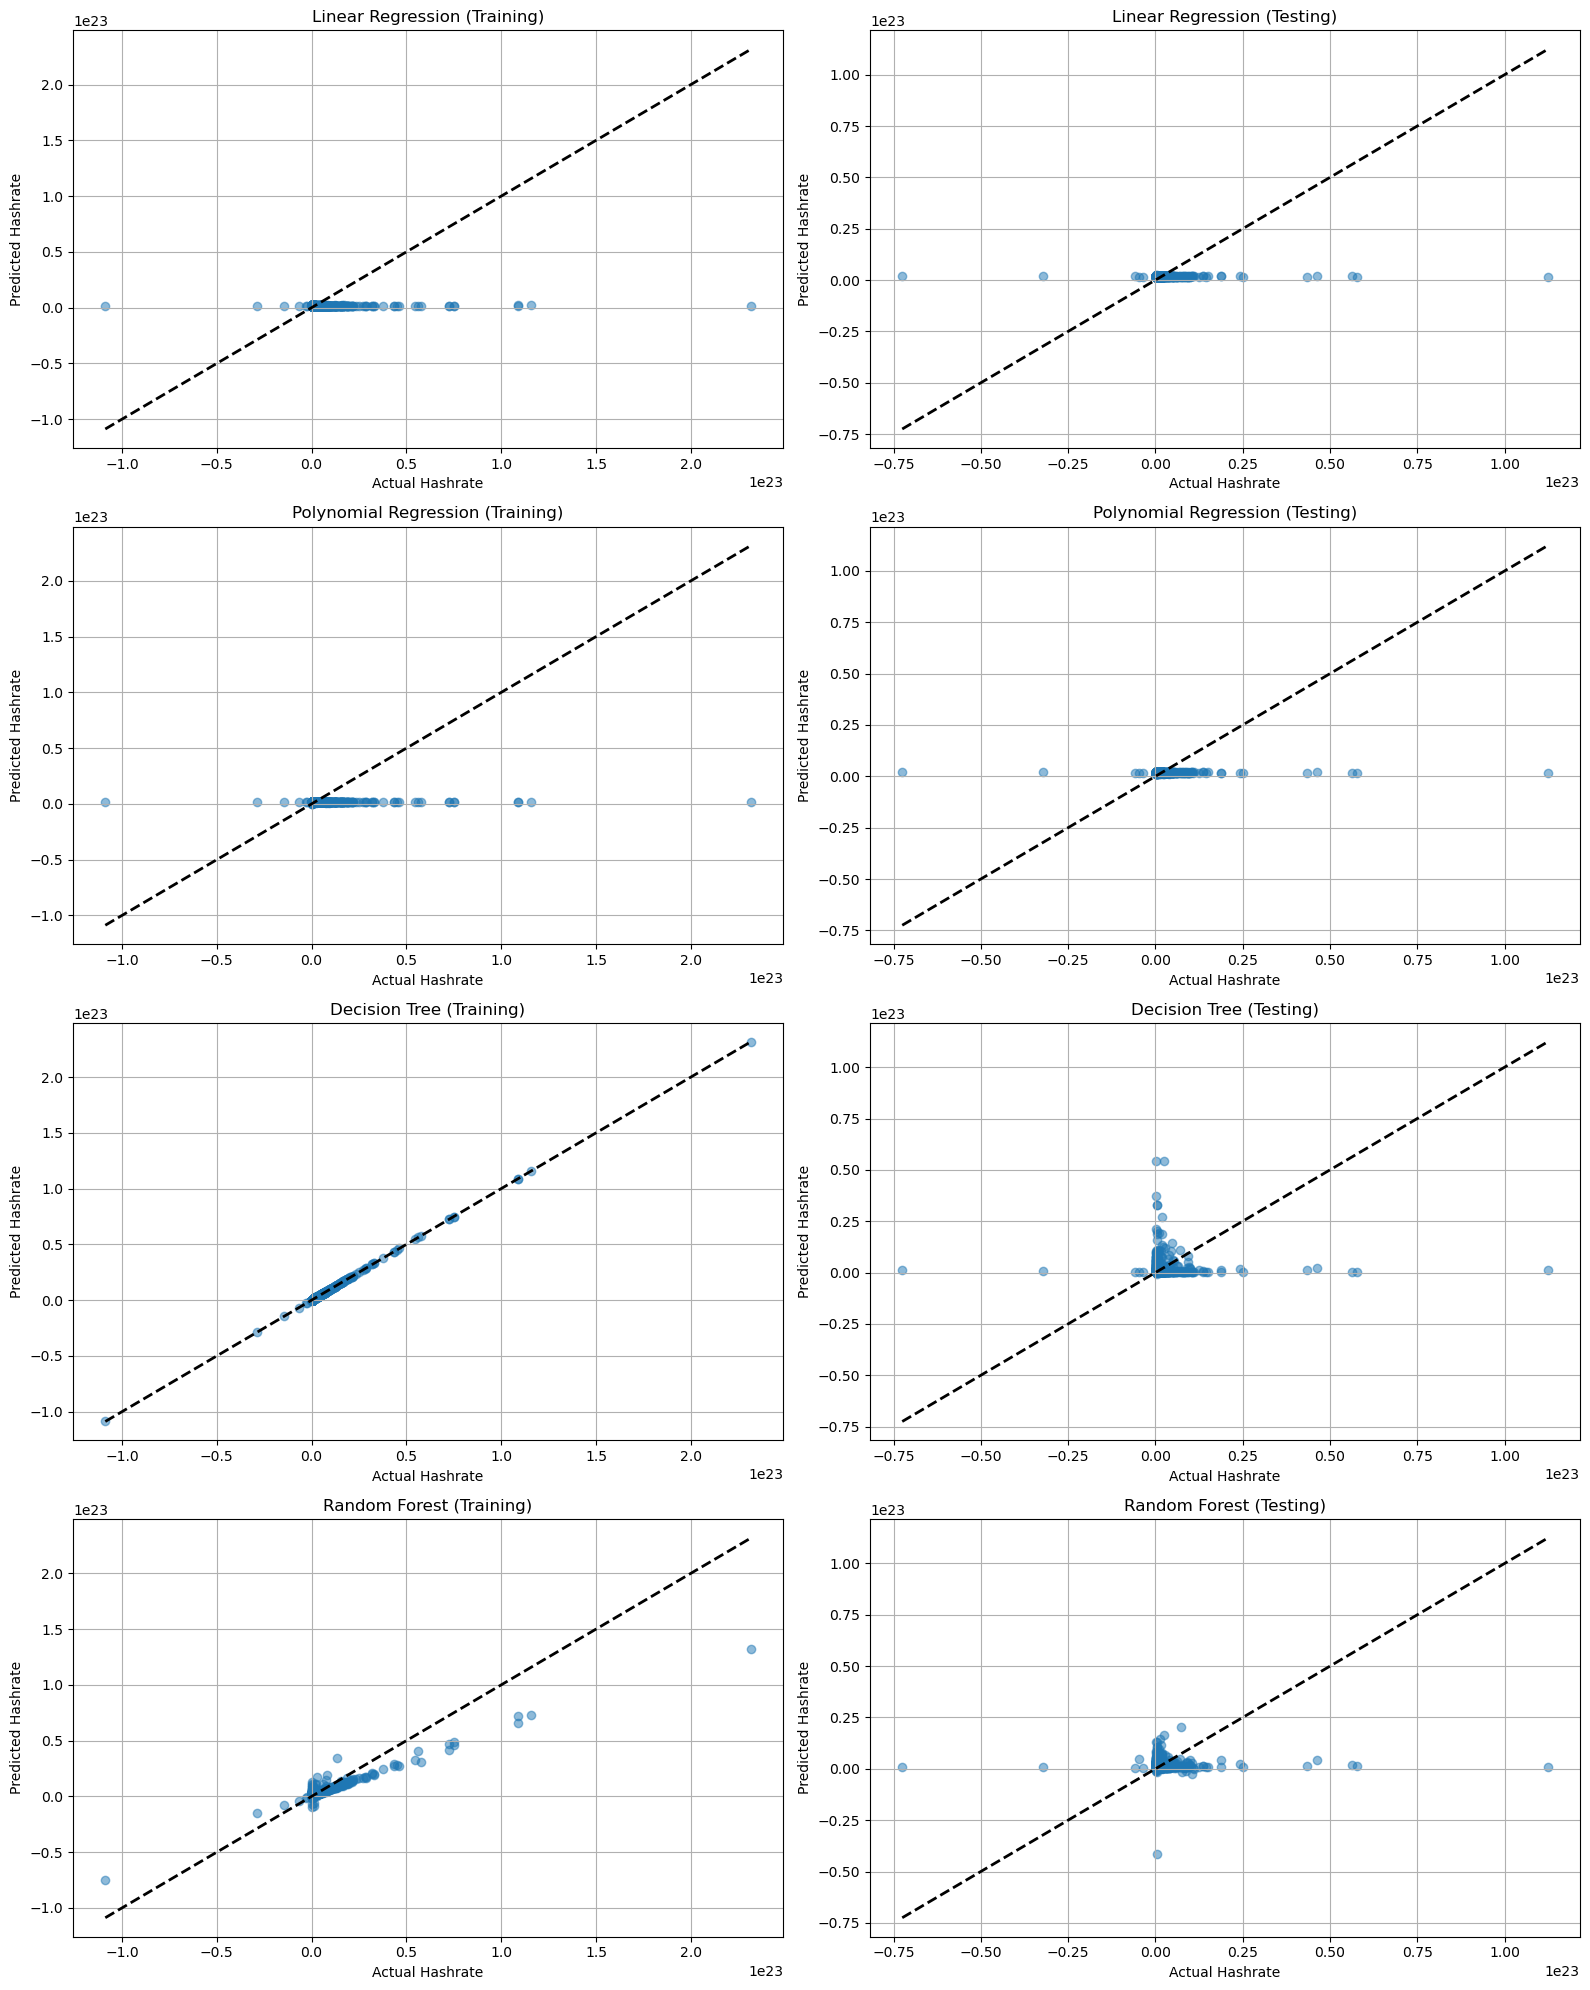

In [21]:
# Setting up the figure and axes
fig, ax = plt.subplots(4, 2, figsize=(16, 20))

# Models and their predictions
models = ["Linear Regression", "Polynomial Regression", "Decision Tree", "Random Forest"]
predictions_train = [y_train_pred, y_train_poly_pred, y_train_tree_pred, y_train_forest_pred]
predictions_test = [y_test_pred, y_test_poly_pred, y_test_tree_pred, y_test_forest_pred]

# Plotting actual vs predicted for each model on training and testing sets
for i, model in enumerate(models):
    ax[i, 0].scatter(y_train, predictions_train[i], alpha=0.5)
    ax[i, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
    ax[i, 0].set_title(f'{model} (Training)')
    ax[i, 0].set_xlabel('Actual Hashrate')
    ax[i, 0].set_ylabel('Predicted Hashrate')
    ax[i, 0].grid(True)
    
    ax[i, 1].scatter(y_test, predictions_test[i], alpha=0.5)
    ax[i, 1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    ax[i, 1].set_title(f'{model} (Testing)')
    ax[i, 1].set_xlabel('Actual Hashrate')
    ax[i, 1].set_ylabel('Predicted Hashrate')
    ax[i, 1].grid(True)

plt.tight_layout()
plt.show()


The above plots display the actual vs. predicted hashrates for each model on both the training and testing sets:

The dashed black line represents the ideal scenario where predictions match the actual values perfectly.
Points close to this line indicate accurate predictions.
Observations:

Linear Regression & Polynomial Regression: Both models seem to produce predictions that are somewhat clustered around the line, but with significant deviations, especially for higher hashrates. This trend is consistent in both training and testing sets.
Decision Tree: The model fits the training data almost perfectly (points lie on the line) indicating overfitting. However, for the testing data, predictions scatter widely around the ideal line.
Random Forest: The training data shows a better clustering around the ideal line compared to linear and polynomial regression, but the testing data still scatters widely.